Mounting google drive, where the data is saved

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Importing train data

In [3]:
import pandas as pd
train = pd.read_csv('/content/drive/My Drive/AI4EIC_hackathon/Question1_train.csv')

In [4]:
train.head()

,eventID,PID,momentum,theta,phi,X0,X1,X2,X3,X4,...,Z50,Z51,Z52,Z53,Z54,Z55,Z56,Z57,Z58,Z59
0,0,321,15.0,19.999999,0.0,1423.794456,1405.205369,1430.641544,1403.547915,1433.835355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,321,15.0,19.999999,0.0,1408.906905,1404.078978,1414.115390,1439.424294,1403.474218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,321,15.0,19.999999,0.0,1430.051250,1426.306782,1432.112305,1439.064895,1401.014764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,211,15.0,19.999999,0.0,1394.185996,1402.319707,1442.940360,1392.319962,1434.855558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,211,15.0,19.999999,0.0,1430.613166,1436.207042,1410.129402,1394.685095,1443.490183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(X0, X1, ..... X59), (Z0, Z1, ......, Z59), (Y0, Y1, ....., Y59), corresponds to the positions on the photo-sensor of the detected optical photons produced by the radiators (gas and aerogel), due to the tracks.

The point (XN, YN, ZN) corresponds to the location of Nth detected optical photon. For ease of data formatting, the maximum number of detected optical photons are restricted to 60 (not so likely to have more than 60 detected optical photons in the kinematic settings in the following problems). When the
number of detected optical photons (N) is less than 60, the corresponding (XN−X59, YN−Y59, ZN−Z59) are padded with (0., 0., 0.)

## Exploratory data analysis

array([[<Axes: title={'center': 'X0'}>, <Axes: title={'center': 'X1'}>],
       [<Axes: title={'center': 'X2'}>, <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X5'}>]],
      dtype=object)

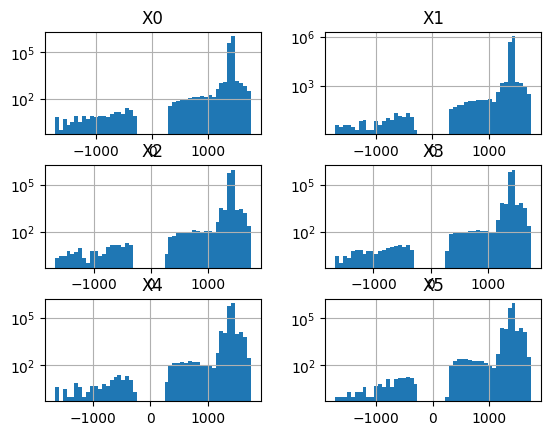

In [5]:
train.hist(column=['X0','X1','X2','X3','X4','X5'],bins=50,log=True)

array([[<Axes: title={'center': 'Y0'}>, <Axes: title={'center': 'Y1'}>],
       [<Axes: title={'center': 'Y2'}>, <Axes: title={'center': 'Y3'}>],
       [<Axes: title={'center': 'Y4'}>, <Axes: title={'center': 'Y5'}>]],
      dtype=object)

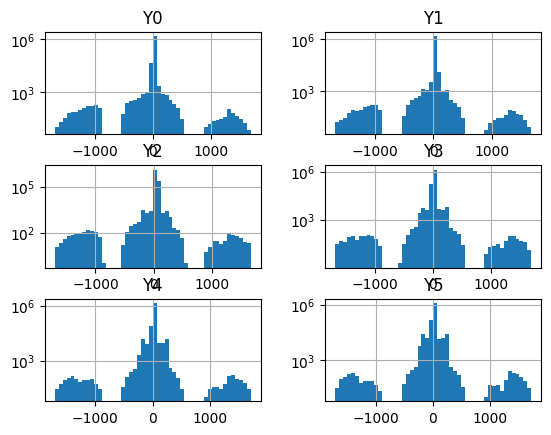

In [6]:
train.hist(column=['Y0','Y1','Y2','Y3','Y4','Y5'],bins=50,log=True)

array([[<Axes: title={'center': 'Z0'}>, <Axes: title={'center': 'Z1'}>],
       [<Axes: title={'center': 'Z2'}>, <Axes: title={'center': 'Z3'}>],
       [<Axes: title={'center': 'Z4'}>, <Axes: title={'center': 'Z5'}>]],
      dtype=object)

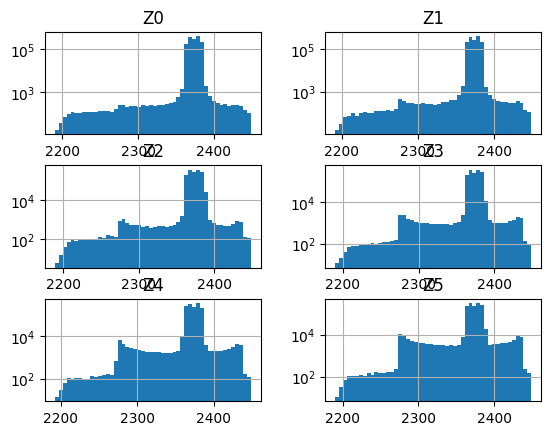

In [7]:
train.hist(column=['Z0','Z1','Z2','Z3','Z4','Z5'],bins=50,log=True)

array([[<Axes: title={'center': 'PID'}>]], dtype=object)

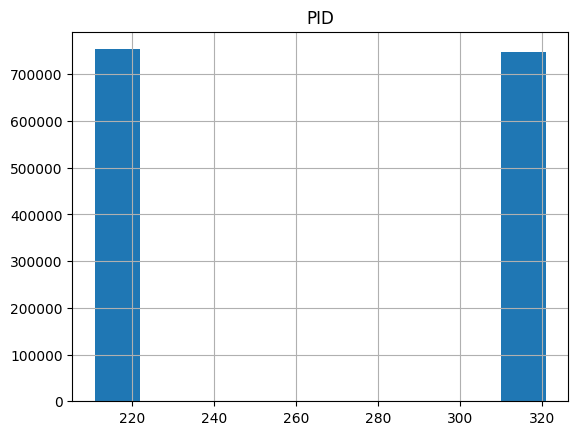

In [8]:
train.hist(column=['PID'])

importing test data

In [9]:
def make_plot(event):
    x = [event[f"X{i}"]*2300/event[f"Z{i}"]  for i in range(0, 60) if event[f"X{i}"] != 0.0]
    y = [event[f"Y{i}"]*2300/event[f"Z{i}"] for i in range(0, 60) if event[f"Y{i}"] != 0.0]

    x1 = [event[f"X{i}"]  for i in range(0, 60) if event[f"X{i}"] != 0.0]
    y1 = [event[f"Y{i}"] for i in range(0, 60) if event[f"Y{i}"] != 0.0]

    plt.figure(figsize = (10, 5))
    plt.xlabel("position X [mm]", fontsize = 5)
    plt.ylabel("position Y [mm]", fontsize = 5)

    plt.subplot(1, 2, 1)
    plt.xlim(-2000,2000)
    plt.ylim(-2000,2000)
    plt.title(f"PID = {event.PID}, p = {'%0.2f'%event.momentum} GeV/c, theta = {'%0.2f'%event.theta} deg, phi = {'%0.2f'%event.phi} deg", fontsize = 8)
    image = plt.scatter(x, y, s = 2, c = 'b')
    image = plt.scatter(x1, y1, s = 2, c = 'r')
    plt.xlabel("position X [mm]", fontsize = 8)
    plt.ylabel("position Y [mm]", fontsize = 8)

    plt.subplot(1, 2, 2)
    plt.xlim(1100,1700)
    plt.ylim(-500,500)
    plt.title(f"PID = {event.PID}, p = {'%0.2f'%event.momentum} GeV/c, theta = {'%0.2f'%event.theta} deg, phi = {'%0.2f'%event.phi} deg", fontsize = 8)
    image = plt.scatter(x, y, s = 2, c = 'b')
    image = plt.scatter(x1, y1, s = 2, c = 'r')
    plt.xlabel("position X [mm]", fontsize = 8)
    plt.ylabel("position Y [mm]", fontsize = 8)

    plt.show()
    # return image

<ipython-input-9-d73c9846f75c>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


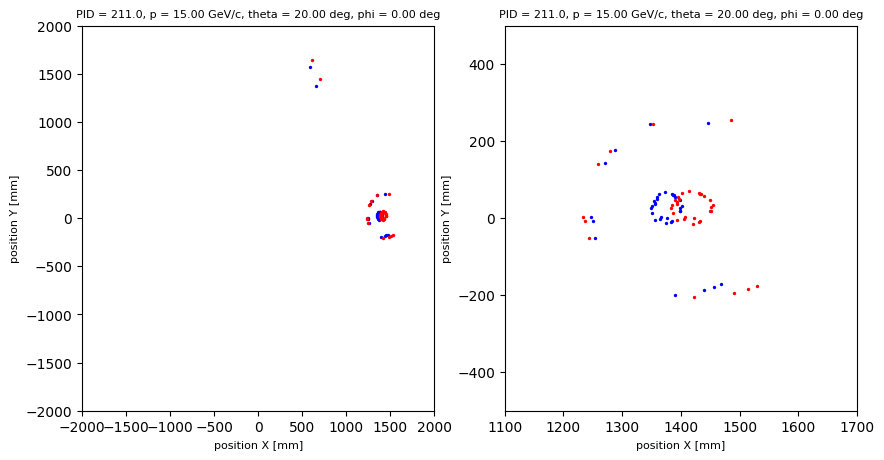

None


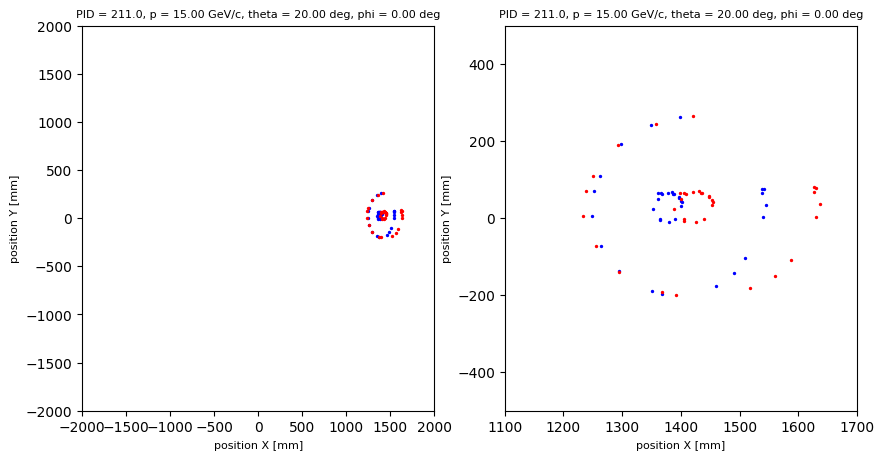

None


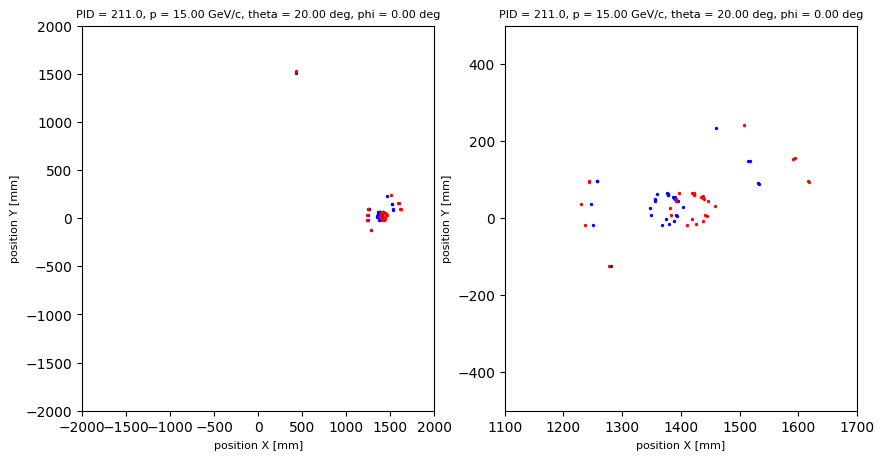

None


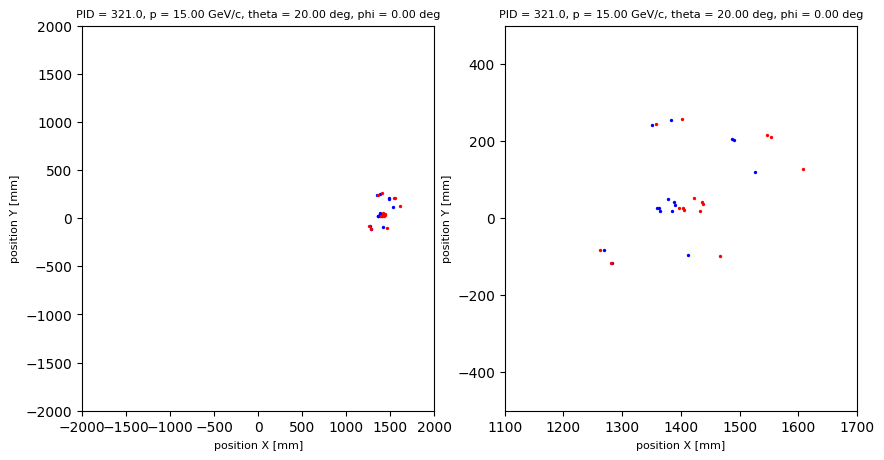

None


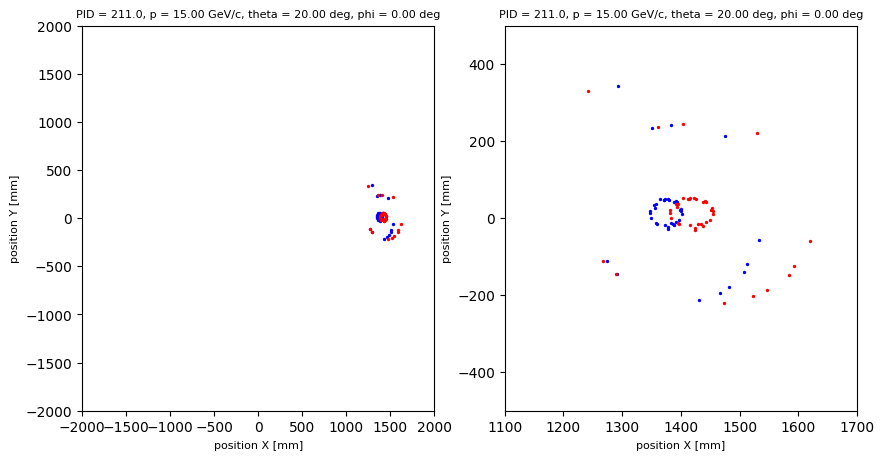

None


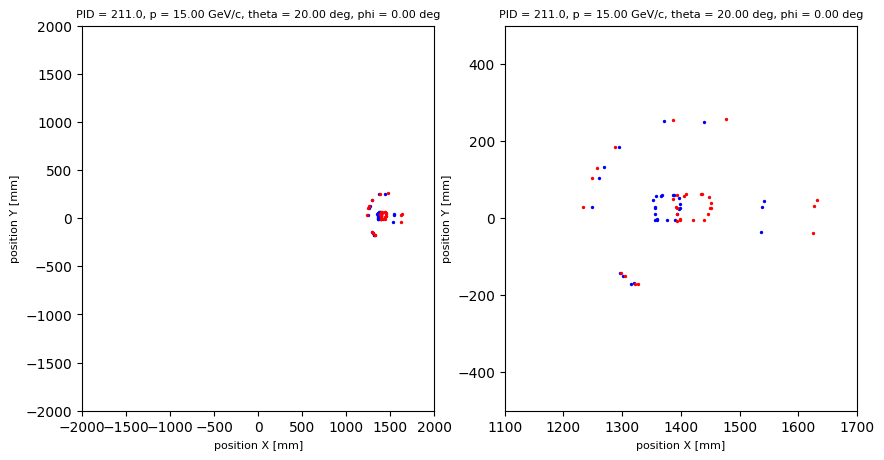

None


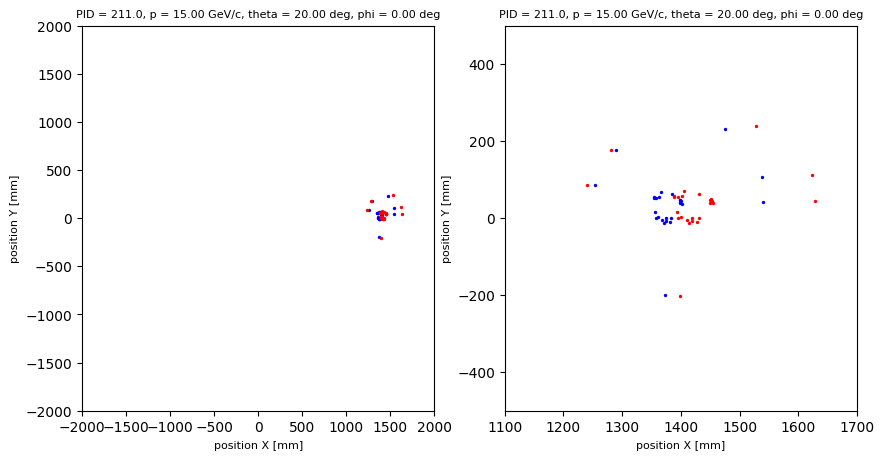

None


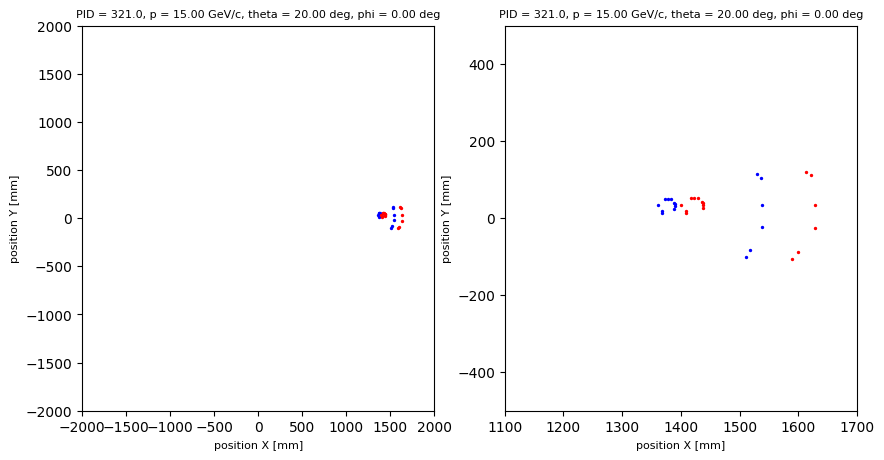

None


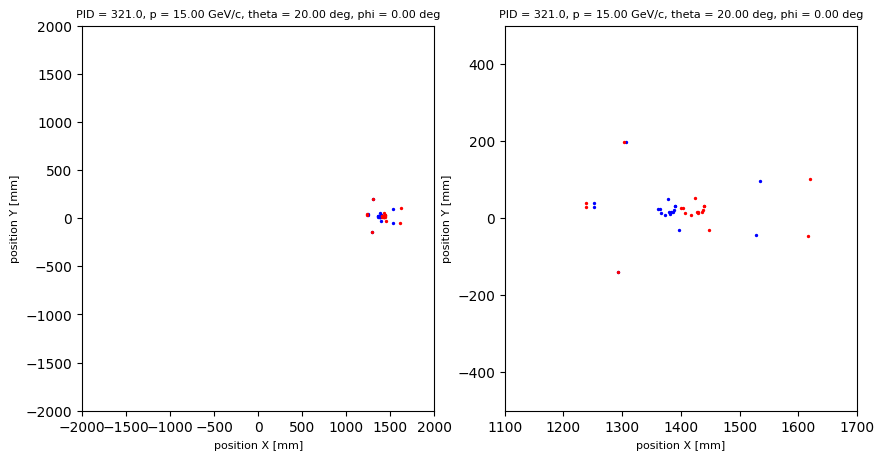

None


In [10]:
for i in range(1,10): print(make_plot(train.iloc[random.randrange(1400000)]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0, 0.5, 'Y bins')

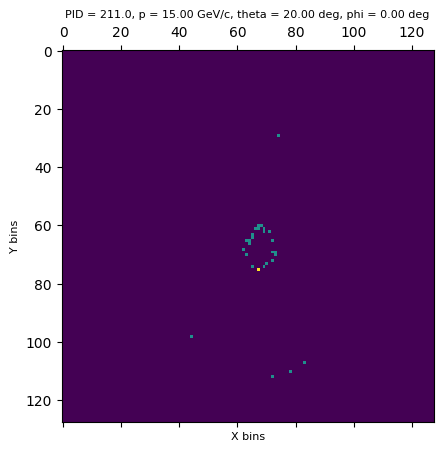

In [11]:
event =train.iloc[1400000]

x = [event[f"X{i}"] for i in range(0, 60) if event[f"X{i}"] != 0.0]
y = [event[f"Y{i}"] for i in range(0, 60) if event[f"Y{i}"] != 0.0]

counts, binsx, binsy = np.histogram2d(x, y, bins=(np.linspace(1100, 1700,129),np.linspace(-500, 500,129)))
print(counts)

plt.matshow(counts)
plt.title(f"PID = {event.PID}, p = {'%0.2f'%event.momentum} GeV/c, theta = {'%0.2f'%event.theta} deg, phi = {'%0.2f'%event.phi} deg", fontsize = 8)
plt.xlabel("X bins", fontsize = 8)
plt.ylabel("Y bins", fontsize = 8)

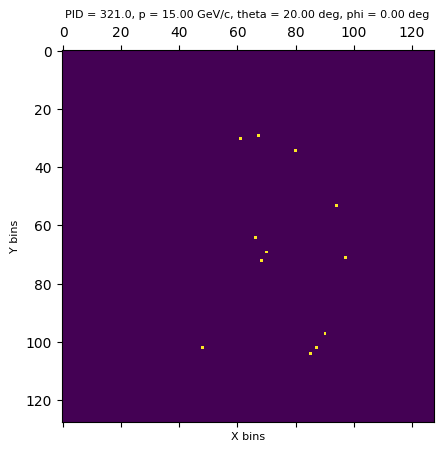

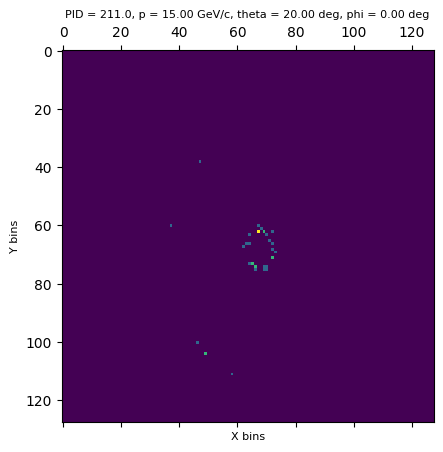

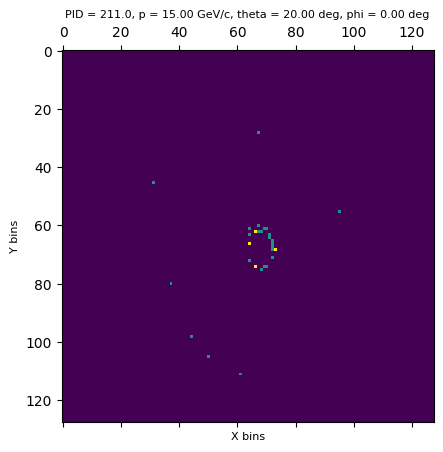

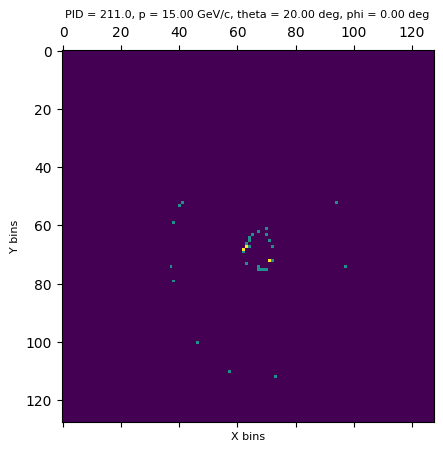

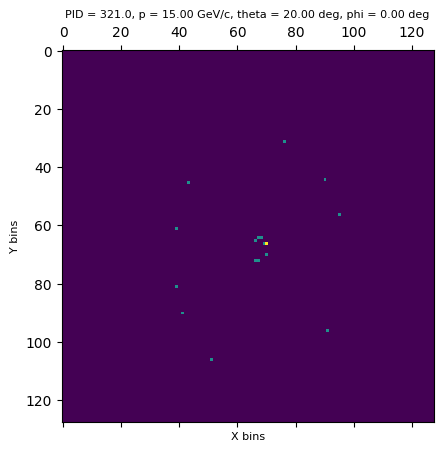

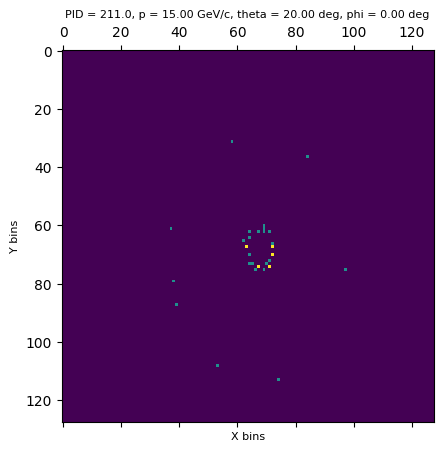

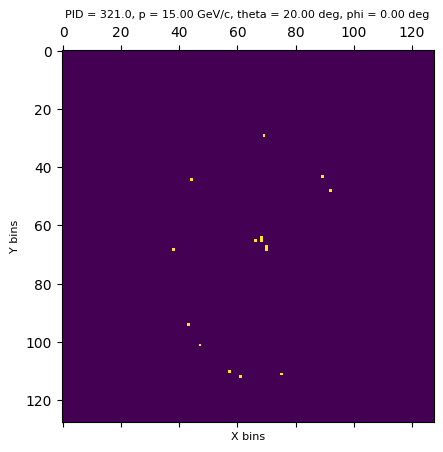

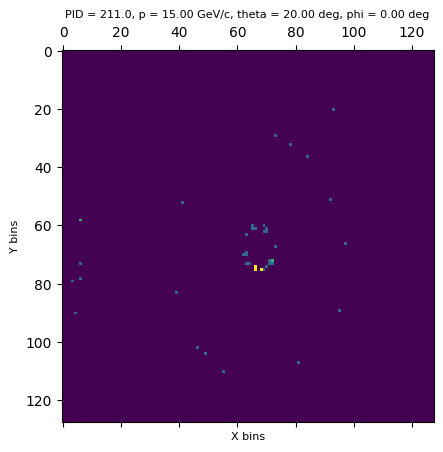

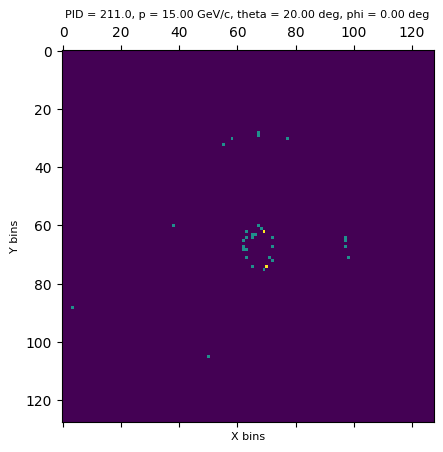

In [12]:
for i in range(1,10):
  event =train.iloc[random.randrange(1400000)]
  x = [event[f"X{i}"] for i in range(0, 60) if event[f"X{i}"] != 0.0]
  y = [event[f"Y{i}"] for i in range(0, 60) if event[f"Y{i}"] != 0.0]
  counts, binsx, binsy = np.histogram2d(x, y, bins=(np.linspace(1100, 1700,129),np.linspace(-500, 500,129)))

  plt.matshow(counts)
  plt.title(f"PID = {event.PID}, p = {'%0.2f'%event.momentum} GeV/c, theta = {'%0.2f'%event.theta} deg, phi = {'%0.2f'%event.phi} deg", fontsize = 8)
  plt.xlabel("X bins", fontsize = 8)
  plt.ylabel("Y bins", fontsize = 8)


In [13]:
data_new =pd.DataFrame({'eventID':[], 'PID':[], 'momentum':[], 'theta':[], 'phi':[], 'image':[] })

length = train.shape[0]
length = 1000


for ii in range(0,length):
  event =train.iloc[ii]
  x = [event[f"X{i}"] for i in range(0, 60) if event[f"X{i}"] != 0.0]
  y = [event[f"Y{i}"] for i in range(0, 60) if event[f"Y{i}"] != 0.0]

  PionKaon  = 0 if event["PID"] == 211 else 1
  counts, binsx, binsy = np.histogram2d(x, y, bins=(np.linspace(1000, 1600,129),np.linspace(-500, 500,129)))


  data_new.loc[ii] = [event["eventID"], PionKaon, event["momentum"], event["theta"], event["phi"], counts]


data_new.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


,eventID,PID,momentum,theta,phi,image
0,0.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3.0,0,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4.0,0,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


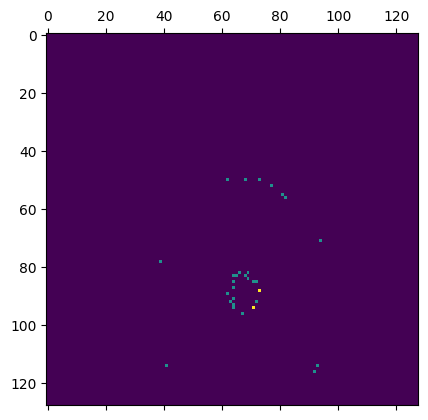

In [14]:
print(data_new.loc[4,"image"])
plt.matshow(data_new.loc[4,"image"])

## Save data

In [15]:
# Save DataFrame to HDF5 file
data_new.to_hdf('/content/drive/My Drive/AI4EIC_hackathon/data_AI4EIC_Q1.h5', key='data_new', mode='w')

# Load DataFrame back from HDF5 file
loaded_df = pd.read_hdf('/content/drive/My Drive/AI4EIC_hackathon/data_AI4EIC_Q1.h5', key='data_new')

<ipython-input-15-a77311214f3c>:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['image'], dtype='object')]

  data_new.to_hdf('/content/drive/My Drive/AI4EIC_hackathon/data_AI4EIC_Q1.h5', key='data_new', mode='w')


In [16]:
loaded_df.head()

,eventID,PID,momentum,theta,phi,image
0,0.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3.0,0,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4.0,0,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


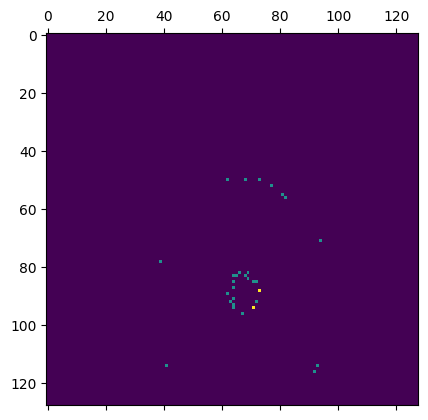

In [17]:
print(loaded_df.loc[4,"image"])
plt.matshow(loaded_df.loc[4,"image"])